In [1]:
from environment import Environment
from agent import Agent
from trainer import Q_learning_trainer, One_step_variational_trainer, Final_variational_trainer, KL_Q_learning_trainer
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Hyperparameters

In [59]:
N = 10000 # Number of episodes
side = 10

In [60]:
# Agent/Environment initialization

In [68]:
env = Environment.square(initial_state_range=0, side = side)

#agent = Agent(GAMMA = 1)
BETA = 5
agent = Agent(env, GAMMA=1, ALPHA=0.3 / BETA, BETA=BETA, do_reward = True)
#agent = Agent(env, GAMMA=1, ALPHA=0.1, BETA=15, do_reward = True)


OBS_LEAK = 1e-2 / env.N_obs
#trainer = Q_learning_trainer(agent, OBS_LEAK=OBS_LEAK, monte_carlo = True)
#trainer = KL_Q_learning_trainer(agent, OBS_LEAK=OBS_LEAK, monte_carlo = True, final = True)
#trainer = one_step_variational_trainer(agent)
trainer = Final_variational_trainer(agent, OBS_LEAK=OBS_LEAK, final = False, monte_carlo = False)

{0: {'E': 1, 'S': 10}, 1: {'E': 2, 'W': 0, 'S': 11}, 2: {'E': 3, 'W': 1, 'S': 12}, 3: {'E': 4, 'W': 2, 'S': 13}, 4: {'E': 5, 'W': 3, 'S': 14}, 5: {'E': 6, 'W': 4, 'S': 15}, 6: {'E': 7, 'W': 5, 'S': 16}, 7: {'E': 8, 'W': 6, 'S': 17}, 8: {'E': 9, 'W': 7, 'S': 18}, 9: {'W': 8, 'S': 19}, 10: {'E': 11, 'S': 20, 'N': 0}, 11: {'E': 12, 'W': 10, 'S': 21, 'N': 1}, 12: {'E': 13, 'W': 11, 'S': 22, 'N': 2}, 13: {'E': 14, 'W': 12, 'S': 23, 'N': 3}, 14: {'E': 15, 'W': 13, 'S': 24, 'N': 4}, 15: {'E': 16, 'W': 14, 'S': 25, 'N': 5}, 16: {'E': 17, 'W': 15, 'S': 26, 'N': 6}, 17: {'E': 18, 'W': 16, 'S': 27, 'N': 7}, 18: {'E': 19, 'W': 17, 'S': 28, 'N': 8}, 19: {'W': 18, 'S': 29, 'N': 9}, 20: {'E': 21, 'S': 30, 'N': 10}, 21: {'E': 22, 'W': 20, 'S': 31, 'N': 11}, 22: {'E': 23, 'W': 21, 'S': 32, 'N': 12}, 23: {'E': 24, 'W': 22, 'S': 33, 'N': 13}, 24: {'E': 25, 'W': 23, 'S': 34, 'N': 14}, 25: {'E': 26, 'W': 24, 'S': 35, 'N': 15}, 26: {'E': 27, 'W': 25, 'S': 36, 'N': 16}, 27: {'E': 28, 'W': 26, 'S': 37, 'N': 1

In [69]:
for i in range(N):
    trainer.run_episode()
    if i%1000 ==0:
        #plt.figure(figsize = (4, 4))
        #plt.plot(agent.KL.flatten())
        print(trainer.nb_trials)
        print("Trajectory: ", trainer.trajectory)
        print("Total reward got: %.4f" % trainer.total_reward)

1
Trajectory:  [0, 10, 0, 1, 2, 3, 4, 3, 4, 5, 15, 16, 6, 16, 17, 7, 7, 17, 18]
Total reward got: 0.0000
1001
Trajectory:  [0, 10, 11, 21, 22, 32, 42, 43, 44, 45, 35, 25, 26, 16, 17, 7, 8, 18, 28]
Total reward got: 0.0000
2001
Trajectory:  [0, 10, 11, 21, 22, 32, 42, 52, 53, 54, 55, 45, 46, 47, 48, 49, 49, 49, 39]
Total reward got: 0.0000
3001
Trajectory:  [0, 10, 11, 21, 22, 32, 42, 41, 51, 61, 71, 81, 82, 83, 84, 85, 75, 76, 77]
Total reward got: 0.0000
4001
Trajectory:  [0, 10, 11, 21, 22, 32, 42, 41, 51, 61, 71, 81, 82, 72, 73, 74, 84, 94, 95]
Total reward got: 0.0000
5001
Trajectory:  [0, 10, 11, 21, 22, 32, 33, 23, 13, 3, 4, 5, 6, 16, 26, 36, 46, 47, 57]
Total reward got: 0.0000
6001
Trajectory:  [0, 10, 11, 21, 22, 32, 33, 43, 44, 54, 64, 65, 66, 67, 68, 58, 48, 49, 39]
Total reward got: 0.0000
7001
Trajectory:  [0, 10, 11, 21, 22, 32, 33, 43, 44, 45, 35, 25, 15, 5, 5, 6, 16, 26, 36]
Total reward got: 0.0000
8001
Trajectory:  [0, 10, 11, 21, 22, 32, 33, 43, 44, 45, 55, 54, 64, 7

In [71]:
agent.Q_var

array([[-1.84768782e+00, -2.30153180e-02, -2.03936294e+00,
        -1.75849213e+00],
       [-9.37462834e-01, -1.30268421e+00, -1.26744653e+00,
        -1.07885318e+00],
       [-7.94822600e-02, -7.34289220e-01, -1.09575374e+00,
        -9.29059609e-01],
       [-1.05758239e+00, -2.93525575e-01, -9.07370435e-01,
        -8.19111870e-01],
       [-7.44590623e-01,  1.86934445e-01, -5.56176042e-01,
        -7.77893210e-01],
       [-2.01154767e-01,  1.17006421e+00,  1.27983542e+00,
        -1.70510190e-01],
       [ 1.78473331e+00,  1.94329755e-01,  1.80077991e+00,
         7.80540284e-03],
       [ 1.22466525e+00,  3.34528412e-01,  1.18089282e+00,
        -8.52572047e-02],
       [ 3.49577405e-01,  1.34572210e+00,  6.84200345e-01,
         1.27414477e+00],
       [ 1.25506934e+00,  1.08475376e+00, -5.23169285e-03,
         1.34160626e+00],
       [ 3.06076675e-03, -2.77242342e+00, -2.95253044e+00,
        -2.73006944e+00],
       [-1.89357748e+00, -1.77595413e-02, -1.74208832e+00,
      

In [72]:
obs = env.get_observation()
agent.Q_var[0,:]

array([-1.84768782, -0.02301532, -2.03936294, -1.75849213])

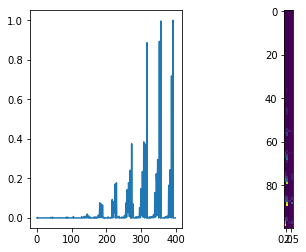

In [73]:
plt.subplot(1,2,1)
plt.plot(agent.Q_ref.flatten())
plt.subplot(1,2,2)
plt.imshow(agent.Q_ref)

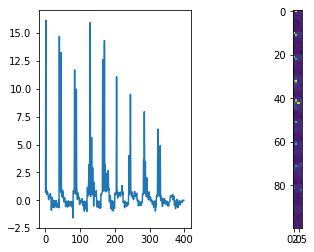

In [74]:
#print('KL', agent.KL)
plt.subplot(1,2,1)
plt.plot(agent.KL.flatten())
plt.subplot(1,2,2)
plt.imshow(agent.KL)

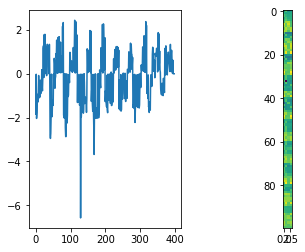

In [75]:
plt.subplot(1,2,1)
plt.plot(agent.Q_var.flatten())
plt.subplot(1,2,2)
plt.imshow(agent.Q_var)

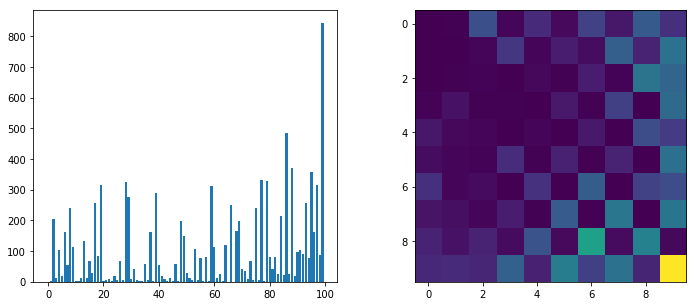

In [76]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.bar(range(env.N_obs), trainer.nb_visits_final)
plt.subplot(1,2,2)
plt.imshow(trainer.nb_visits_final.reshape(side,side))

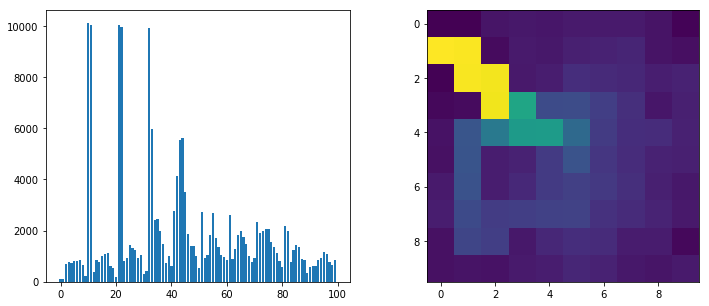

In [77]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.bar(range(env.N_obs), trainer.nb_visits)
plt.subplot(1,2,2)
plt.imshow(trainer.nb_visits.reshape(side,side))

[0.00000000e+00 2.10694457e+00 1.87014389e+02 8.96518040e+00
 8.64028051e+01 1.21044746e+01 1.25722737e+02 3.17340196e+01
 1.71285326e+02 8.99391330e+01 3.70482285e-01 2.14265334e+00
 5.33293952e+00 1.21842542e+02 7.68231250e+00 5.73514308e+01
 1.76452327e+01 1.92161210e+02 5.39902369e+01 2.32066644e+02
 1.26691570e+00 1.85486056e+00 4.49577187e+00 1.98335443e+00
 1.06952519e+01 2.46793931e+00 4.43472175e+01 3.90397212e+00
 2.42608480e+02 2.01409720e+02 4.00424064e+00 1.81866270e+01
 2.09370706e+00 1.88442819e+00 1.10771529e+00 4.73098472e+01
 2.89923537e+00 1.10239973e+02 7.82416324e-01 2.10247609e+02
 2.52167900e+01 8.41909570e+00 3.95354725e+00 1.12925230e+00
 5.16123064e+00 3.69483282e-01 3.00488766e+01 1.59429015e+00
 1.34343337e+02 1.01576132e+02 1.22076322e+01 6.05213971e+00
 2.67231768e+00 6.09452721e+01 1.85400778e+00 4.00833925e+01
 2.42623415e+00 4.89319969e+01 1.36485005e+00 1.96359864e+02
 5.37741420e+01 5.05298951e+00 1.00121946e+01 1.23364813e+00
 6.41213768e+01 0.000000

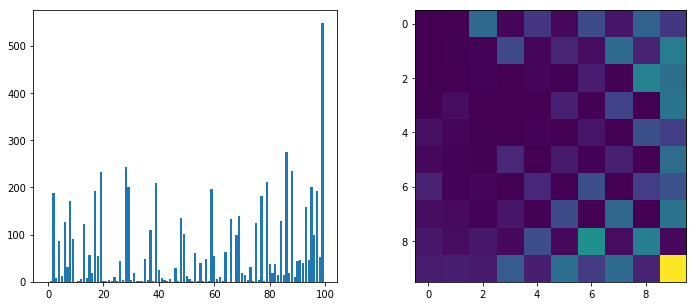

In [78]:
print(trainer.obs_score_final)
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.bar(range(env.N_obs), trainer.obs_score_final)
plt.subplot(1,2,2)
plt.imshow(trainer.obs_score_final.reshape(side,side))

[0.00000000e+00 2.10694457e+00 1.87014389e+02 8.96518040e+00
 8.64028051e+01 1.21044746e+01 1.25722737e+02 3.17340196e+01
 1.71285326e+02 8.99391330e+01 3.70482285e-01 2.14265334e+00
 5.33293952e+00 1.21842542e+02 7.68231250e+00 5.73514308e+01
 1.76452327e+01 1.92161210e+02 5.39902369e+01 2.32066644e+02
 1.26691570e+00 1.85486056e+00 4.49577187e+00 1.98335443e+00
 1.06952519e+01 2.46793931e+00 4.43472175e+01 3.90397212e+00
 2.42608480e+02 2.01409720e+02 4.00424064e+00 1.81866270e+01
 2.09370706e+00 1.88442819e+00 1.10771529e+00 4.73098472e+01
 2.89923537e+00 1.10239973e+02 7.82416324e-01 2.10247609e+02
 2.52167900e+01 8.41909570e+00 3.95354725e+00 1.12925230e+00
 5.16123064e+00 3.69483282e-01 3.00488766e+01 1.59429015e+00
 1.34343337e+02 1.01576132e+02 1.22076322e+01 6.05213971e+00
 2.67231768e+00 6.09452721e+01 1.85400778e+00 4.00833925e+01
 2.42623415e+00 4.89319969e+01 1.36485005e+00 1.96359864e+02
 5.37741420e+01 5.05298951e+00 1.00121946e+01 1.23364813e+00
 6.41213768e+01 0.000000

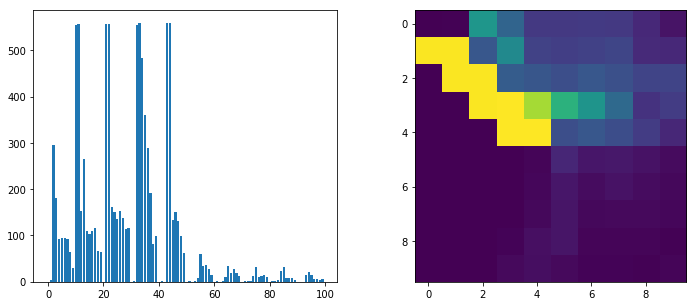

In [79]:
print(trainer.obs_score_final)
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.bar(range(env.N_obs), trainer.obs_score)
plt.subplot(1,2,2)
plt.imshow(trainer.obs_score.reshape(side,side))

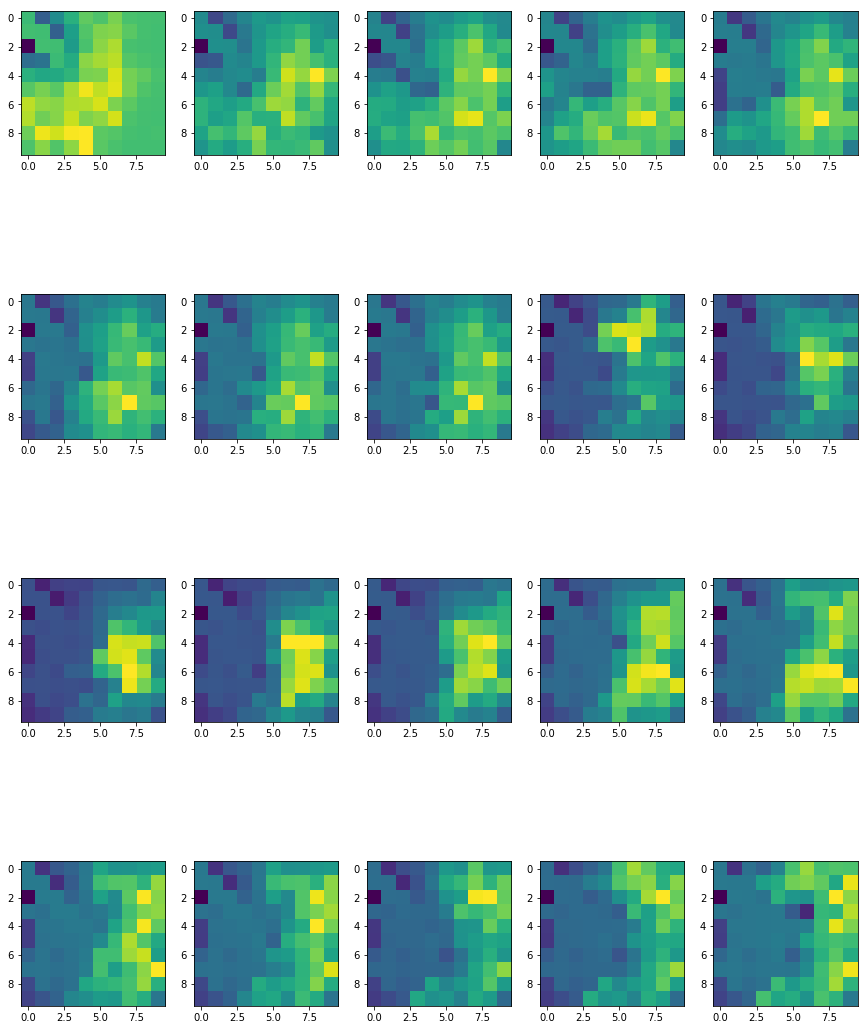

In [80]:
plt.figure(figsize=(15,20))
for i in range(1, 21):
    plt.subplot(4,5,i)
    plt.imshow(trainer.mem_V[i * N//20].reshape(side,side))

In [ ]:
trainer.mem_V